In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

In [2]:
#lOADING DATASET 
#df = pd.read_csv("Data/review-details_major p .csv",encoding="latin1") #due to special charas should be encoded as latin 1
# df = pd.read_csv("Data/review-details.xlsx",encoding="latin1")
df = pd.read_excel("Data/review-details.xlsx")
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#TOTAL ROWS AND COLUMNS
n_reviews, n_attributes = df.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)

Total Reviews:  2501
Total Attributes:  32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   report_date             2501 non-null   datetime64[ns]
 1   online_store            2501 non-null   object        
 2   upc                     2501 non-null   int64         
 3   retailer_product_code   2501 non-null   object        
 4   brand                   2501 non-null   object        
 5   category                2501 non-null   object        
 6   sub_category            2501 non-null   object        
 7   product_description     2501 non-null   object        
 8   review_date             2501 non-null   datetime64[ns]
 9   review_rating           2501 non-null   int64         
 10  review_title            2396 non-null   object        
 11  review_text             2501 non-null   object        
 12  is_competitor           2501 non-null   int64   

In [5]:
df.head()

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,review_title,review_text,is_competitor,manufacturer,market,matched_keywords,time_of_publication,url,review_type,parent_review,manufacturers_response,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,2019-01-02,FRESHAMAZON,8718114216478,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,2019-01-01,5,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RE...,Organic,Child,NaN,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R1...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,4,Vitamin B12.,Excellent,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RD...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,2019-01-03,FRESHAMAZON,8712566479726,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,2019-01-02,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R2...,Organic,Parent,NaN,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,2019-01-03,FRESHAMAZON,8717163536476,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,2019-01-02,5,Very handy,Does what is says it does,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RJ...,Organic,Parent,NaN,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


In [6]:
df.describe()

,report_date,upc,review_date,review_rating,is_competitor,matched_keywords,time_of_publication,manufacturers_response,dimension4,dimension5,dimension6,helpful_review_count
count,2501,2.501000e+03,2501,2501.000000,2501.0,0.0,0.0,0.0,0.0,0.0,0.0,2501.000000
mean,2019-03-29 10:45:26.269492224,7.632299e+12,2019-03-03 22:39:58.080767744,4.456218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.231507
min,2019-01-02 00:00:00,4.218266e+07,2019-01-01 00:00:00,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2019-02-26 00:00:00,8.710447e+12,2019-01-30 00:00:00,4.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,2019-03-22 00:00:00,8.710448e+12,2019-02-20 00:00:00,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,2019-05-07 00:00:00,8.712562e+12,2019-04-08 00:00:00,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,2019-05-27 00:00:00,8.722701e+12,2019-05-24 00:00:00,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
std,NaN,2.108171e+12,NaN,1.108595,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.953930


In [7]:
df.describe(include=object)

,online_store,retailer_product_code,brand,category,sub_category,product_description,review_title,review_text,manufacturer,market,url,review_type,parent_review,dimension1,dimension2,dimension3,dimension7,dimension8,review_hash_id
count,2501,2501,2501,2501,2501,2501,2396,2501,2501,2501,1654,2501,2501,2501,2501,2310,2499,2501,2501
unique,9,367,35,4,16,219,1243,1622,1,1,1571,2,2,16,106,94,15,1,2501
top,AMAZON,B077YLQ2R1,Comfort,Personal Care,Laundry,Simple x Little Mix Micellar Cleansing Wipes 2...,Great value,Good,Unilever Global,UK,https://www.sainsburys.co.uk/shop/gb/groceries...,Organic,Parent,Laundry,COTC Fabric Conditioner,COTC Fabric Conditioner,Retailer Core of the Core,Core of the Core,3f129b02-ea76-0323-bd59-235d97a4f83f
freq,1102,97,480,1182,993,108,48,25,2501,2501,52,1936,1800,993,326,276,1281,2501,1


In [8]:
df["review_type"].value_counts(normalize=True).to_frame()

,proportion
review_type,
Organic,0.77409
Syndicated,0.22591


In [9]:
df["parent_review"].value_counts(normalize=True).to_frame()

,proportion
parent_review,
Parent,0.719712
Child,0.280288


In [10]:
df["review_date"].value_counts().to_frame()

,count
review_date,
2019-02-19,70
2019-01-26,49
2019-02-01,47
2019-02-20,46
2019-05-01,40
2019-02-26,39
2019-01-31,38
2019-02-18,36
2019-01-14,36


In [11]:
df["report_date"].value_counts().to_frame()

,count
report_date,
2019-05-26,217
2019-02-28,201
2019-05-27,134
2019-03-25,122
2019-03-21,81
2019-02-22,56
2019-05-23,55
2019-03-22,50
2019-02-08,39


In [12]:
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

count
category      sub_category                        
Foods         Dressings                         36
              Ice Cream                         39
              Other Foods                       16
              Savoury                          100
Homecare      HHC                               27
              Household Care                    30
              Laundry                          993
Personal Care Deodorants & Fragrances          125
              Deos                             100
              Hair                             108
              Hair Care                         77
              Personal Care                     22
              Skin Care                        476
              Skin Cleansing                   274
Refreshment   Ice Cream                         70
              Tea                                3
              Tea and Soy & Fruit Beverages      5

In [13]:
# #CHANGING THE CATEGORIES AND SUB-CATEGORIES

df.loc[df.sub_category == "Ice Cream", "category"] = "Refreshment"
df.loc[df.sub_category == "HHC", "sub_category"] = "Household Care"
df.loc[df.sub_category == "Deos", "sub_category"] = "Deodorants & Fragrances"
df.loc[df.sub_category == "Tea", "sub_category"] = "Tea and Soy & Fruit Beverages"
df.loc[df.sub_category == "Hair Care", "sub_category"] = "Hair"
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

count
category      sub_category                        
Foods         Dressings                         36
              Other Foods                       16
              Savoury                          100
Homecare      Household Care                    57
              Laundry                          993
Personal Care Deodorants & Fragrances          225
              Hair                             185
              Personal Care                     22
              Skin Care                        476
              Skin Cleansing                   274
Refreshment   Ice Cream                        109
              Tea and Soy & Fruit Beverages      8

In [14]:
df["online_store"].value_counts().to_frame()

,count
online_store,
AMAZON,1102
AMAZONPRIMEPANTRY,389
BOOTS,378
SUPERDRUG,188
OCADO,168
SAINSBURYS,123
ASDA,109
FRESHAMAZON,40
MORRISONS,4


In [15]:
#CHECKING THE NUMBER OF NULL VALUES ACROSS THE DATASET
df.isnull().sum()

report_date                  0
online_store                 0
upc                          0
retailer_product_code        0
brand                        0
category                     0
sub_category                 0
product_description          0
review_date                  0
review_rating                0
review_title               105
review_text                  0
is_competitor                0
manufacturer                 0
market                       0
matched_keywords          2501
time_of_publication       2501
url                        847
review_type                  0
parent_review                0
manufacturers_response    2501
dimension1                   0
dimension2                   0
dimension3                 191
dimension4                2501
dimension5                2501
dimension6                2501
dimension7                   2
dimension8                   0
verified_purchase            0
helpful_review_count         0
review_hash_id               0
dtype: i

In [16]:
#DISPLAYS THE NUMBER OF DUPLICATED VALUES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  0


In [17]:
#TEXTUAL ATTRIBUTES
cols = ['review_date','review_title', 'review_text','review_rating','verified_purchase']
textual_attributes = df[cols]
pd.DataFrame(textual_attributes).head()

,review_date,review_title,review_text,review_rating,verified_purchase
0,2019-01-01,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",5,True
1,2019-01-02,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,5,True
2,2019-01-02,Vitamin B12.,Excellent,4,True
3,2019-01-02,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,5,True
4,2019-01-02,Very handy,Does what is says it does,5,False


In [18]:
#DIMENSIONS 1 - 8
cols = ['dimension1', 'dimension2','dimension3','dimension4','dimension5', 'dimension6','dimension7','dimension8']
dimensions = df[cols]
pd.DataFrame(dimensions).head()

,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8
0,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core
1,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core
2,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core
3,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core
4,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core


#EDA

In [19]:
#SETTING SEABORN STYLE
sns.set_style('darkgrid')

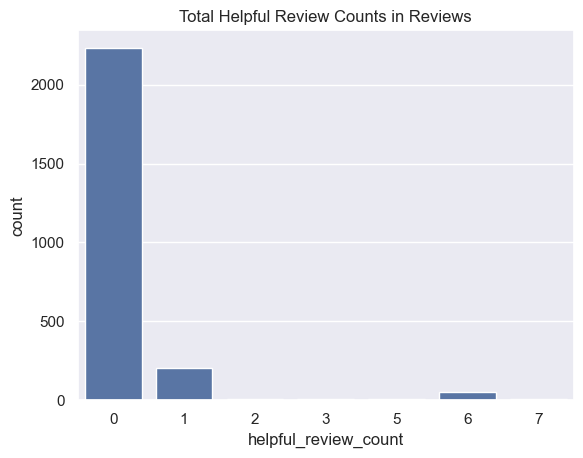

In [20]:
#COUNTPLOT ON TOTAL HELPFUL_REVIEW_COUNTS
sns.countplot(x ='helpful_review_count', 
              data = df).set_title("Total Helpful Review Counts in Reviews")
plt.show()

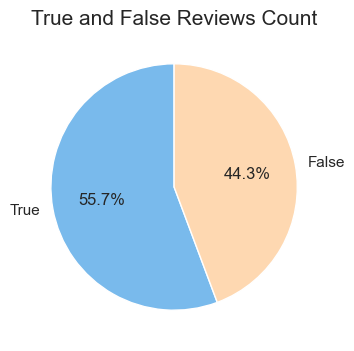

In [21]:
#PIE CHART ON VERFIED PURCHASES - check one
colors = ['#79BAEC','#FED8B1']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

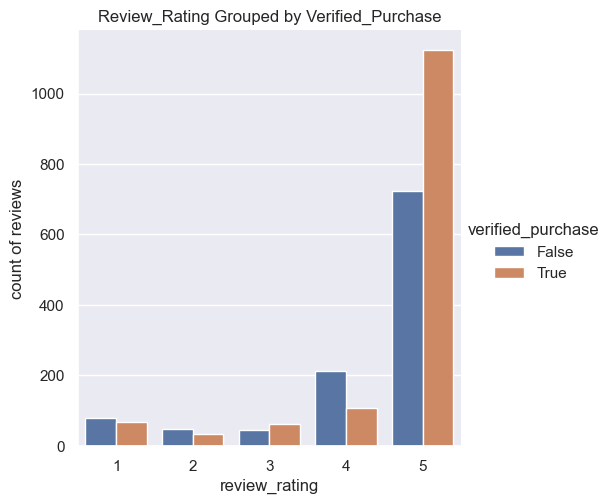

In [22]:
#COUNTPLOT OF REVIEW RATING GROUPED BY VERIFIED PURCHASE
sns.catplot(x ='review_rating',kind="count", hue="verified_purchase",
            data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

Text(0.5, 1.0, 'Count of Product Categories')

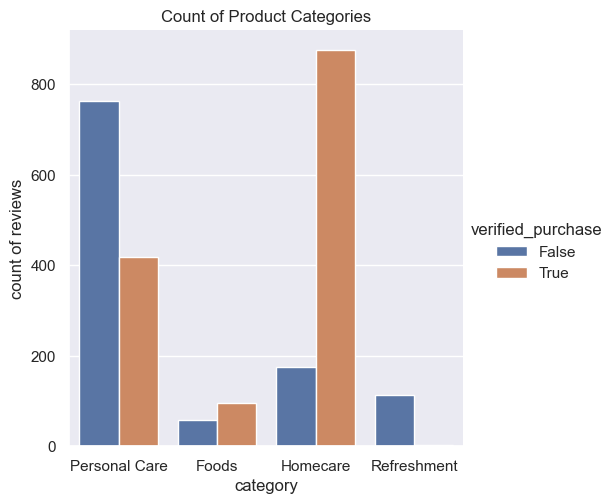

In [23]:
sns.catplot(x ='category',kind="count", hue = "verified_purchase", data=df)
plt.xlabel("category")
plt.ylabel("count of reviews")
plt.title("Count of Product Categories")

Text(0.5, 1.0, 'Count of Product Sub Categories')

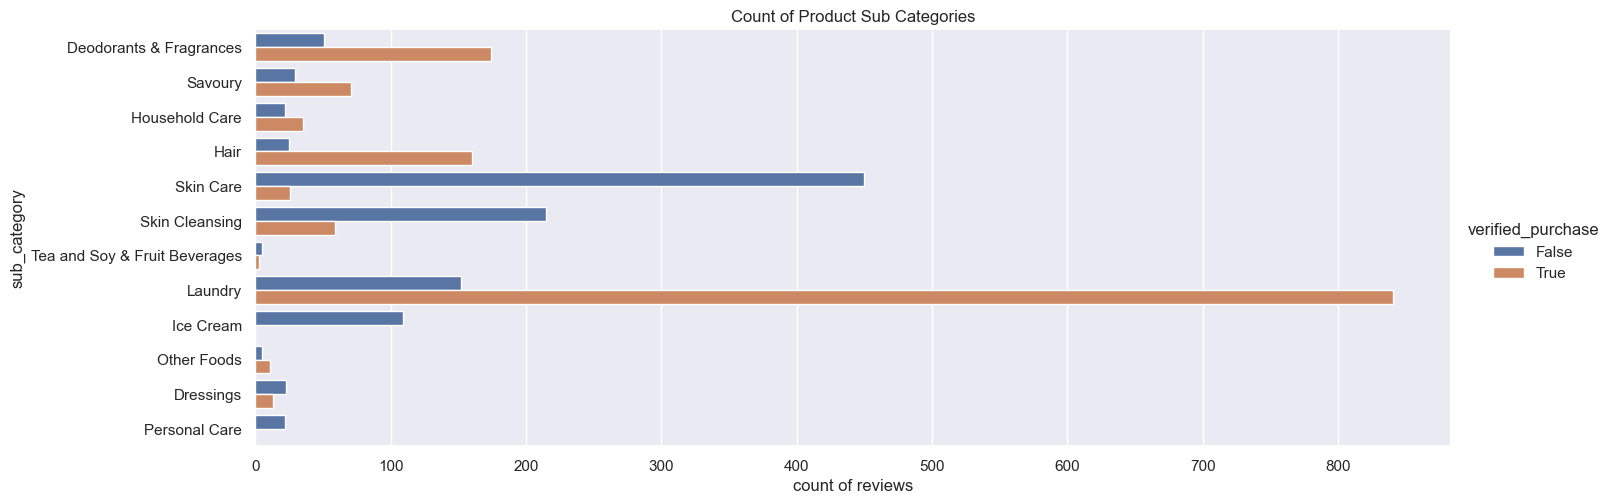

In [24]:
sns.catplot(y ='sub_category',kind="count", hue = "verified_purchase", data=df,  height=5, aspect=3)
plt.ylabel("sub_category")
plt.xlabel("count of reviews")
plt.title("Count of Product Sub Categories")

#review text EDA 


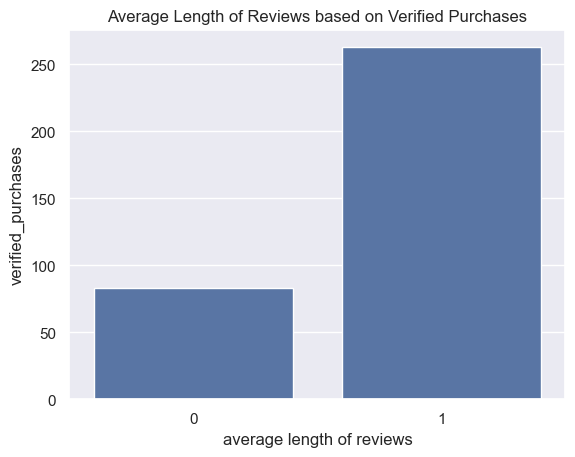

In [25]:
cols = ["verified_purchase", "review_text"]
vprt = df[cols] #making a subset of the dataframe-

#FILTERING BASED ON TRUE AND FALSE VP
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]


#AVERAGE REVIEW LENGTH BASED ON TRUE AND FALSE VP
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

#PLOTTING THE GRAPH
x = [true_average_length,false_average_length]
y = ["True", "False"]
# sns.barplot(x, y)
sns.barplot(x)
plt.xlabel("average length of reviews")
plt.ylabel("verified_purchases")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()


In [26]:
#DROP AFOREMENTIONED COLUMNS
df.drop(['matched_keywords', 'time_of_publication'
         ,'manufacturers_response', 'dimension4',
         'dimension5', 'dimension6', 
         'is_competitor', 'helpful_review_count',
        'report_date','online_store','brand',
         'category','sub_category', 'market',
        'upc', 'retailer_product_code', 'review_hash_id', 
         'url','product_description', 'parent_review', 
         'review_type', 'manufacturer', 'dimension1', 
         'dimension2','dimension3','dimension4',
         'dimension5', 'dimension7', 
         'dimension8'], axis=1, inplace=True)
df.head() #UPDATED DATAFRAME

,review_date,review_rating,review_title,review_text,verified_purchase
0,2019-01-01,5,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",True
1,2019-01-02,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2019-01-02,4,Vitamin B12.,Excellent,True
3,2019-01-02,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,2019-01-02,5,Very handy,Does what is says it does,False


In [27]:
#SAVING UPDATED DATAFRAME AS .csv FILE
df.to_csv('Data/updated_data.csv')

# TEXT DATA EXPLORATION AND PRE-PROCESSING


In [28]:
#LIBRARIES 
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer 
import string
import re
import warnings
warnings.simplefilter("ignore")

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [31]:
#lOADING DATASET 
df = pd.read_csv("Data/updated_data.csv",encoding="latin1") #due to special charas should be encoded as latin 1
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df.head()

,Unnamed: 0,review_date,review_rating,review_title,review_text,verified_purchase
0,0,2019-01-01,5,Dove Menâs + Deodorant,"As you get older, you know what you like and w...",True
1,1,2019-01-02,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2,2019-01-02,4,Vitamin B12.,Excellent,True
3,3,2019-01-02,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,4,2019-01-02,5,Very handy,Does what is says it does,False


In [33]:
#DROPPING UNWANTED COLUMN
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        2501 non-null   object
 1   review_rating      2501 non-null   int64 
 2   review_title       2396 non-null   object
 3   review_text        2501 non-null   object
 4   verified_purchase  2501 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 80.7+ KB


In [35]:
#CHECK TOTAL DUPLICATE OCCURENCES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  783


In [36]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        1718 non-null   object
 1   review_rating      1718 non-null   int64 
 2   review_title       1650 non-null   object
 3   review_text        1718 non-null   object
 4   verified_purchase  1718 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 55.5+ KB


In [37]:
df.isnull().sum()

review_date           0
review_rating         0
review_title         68
review_text           0
verified_purchase     0
dtype: int64

In [38]:
#DROP review_title
df.drop(["review_title","review_date"], axis=1, 
        inplace=True)
df.head()

,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


#EDA ON THE REVIEW TEXT

In [40]:
#WORD COUNT
df['total words'] = df['review_text'].apply(lambda i: len(str(i).split(" ")))

#CHARACTER COUNT
df['total characters'] = df['review_text'].str.len() #spaces are included

#STOPWORDS COUNT
sw = set(stopwords.words('english'))
df['total stopwords'] = df['review_text'].str.split().apply(lambda i: len(set(i) & sw))

#PUNCTUATION AND SPECIAL CHARA COUNT
count_p = lambda p1,p2: sum([1 for i in p1 if i in p2])
df['total punctuations'] = df.review_text.apply(lambda p: count_p(p, string.punctuation))

#UPPERCASE CHARA COUNT
df['total uppercases'] = df['review_text'].str.findall(r'[A-Z]').str.len() #findall - finds all

In [41]:
df.head() #UPDATED 

,review_rating,review_text,verified_purchase,total words,total characters,total stopwords,total punctuations,total uppercases
0,5,"As you get older, you know what you like and w...",True,39,202,10,7,5
1,5,Three gigantic marmite jars that will last pro...,True,30,175,7,6,4
2,4,Excellent,True,1,9,0,0,1
3,5,A great flavour top - up for slow cooking.,True,9,42,2,2,1
4,5,Does what is says it does,False,6,25,4,0,1


In [42]:
df.describe()

,review_rating,total words,total characters,total stopwords,total punctuations,total uppercases
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,4.441793,33.198487,178.011641,9.257276,4.428405,3.710128
std,1.123083,35.251879,189.903638,8.537092,5.178620,4.209264
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,41.000000,2.000000,1.000000,1.000000
50%,5.000000,21.000000,115.000000,7.000000,3.000000,2.000000
75%,5.000000,50.000000,268.750000,15.000000,7.000000,5.000000
max,5.000000,287.000000,1624.000000,48.000000,42.000000,54.000000


In [43]:
print(df.groupby("verified_purchase").describe())

                  review_rating                                               \
                          count      mean       std  min  25%  50%  75%  max   
verified_purchase                                                              
False                     900.0  4.315556  1.187805  1.0  4.0  5.0  5.0  5.0   
True                      818.0  4.580685  1.030249  1.0  5.0  5.0  5.0  5.0   

                  total words                                               \
                        count       mean        std  min   25%   50%   75%   
verified_purchase                                                            
False                   900.0  50.271111  36.854098  1.0  23.0  48.0  63.0   
True                    818.0  14.414425  21.041211  1.0   3.0   8.0  17.0   

                         total characters                               \
                     max            count        mean         std  min   
verified_purchase                                           

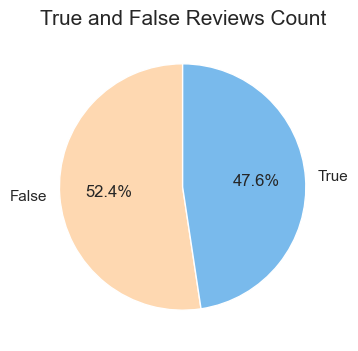

In [44]:
#PIE CHART ON VERFIED PURCHASES -two
colors = ['#FED8B1','#79BAEC']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

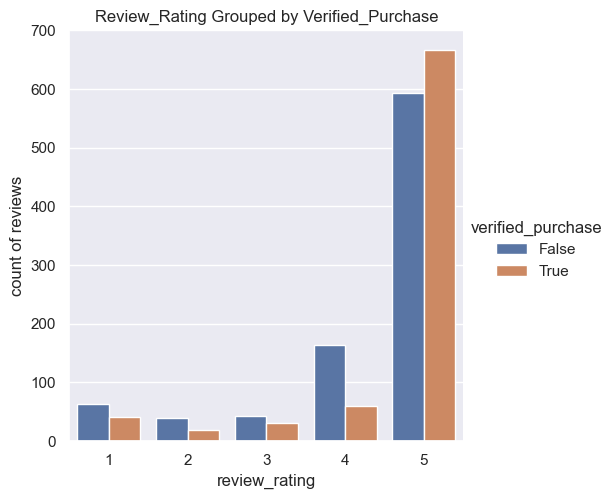

In [45]:
sns.catplot(x ='review_rating',kind="count", hue="verified_purchase", data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

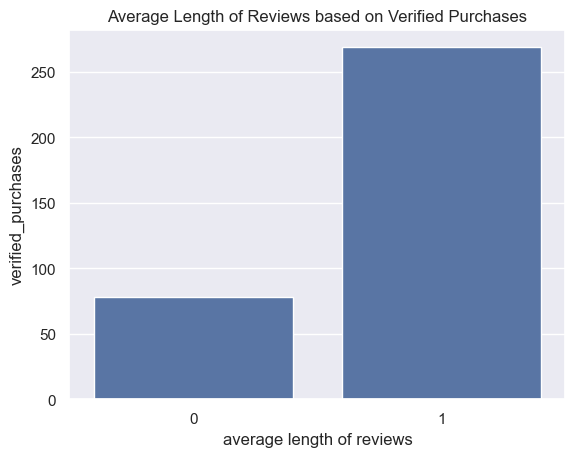

In [46]:
cols = ["verified_purchase", "review_text"]
vprt = df[cols] #making a subset of the dataframe-

#FILTERING BASED ON TRUE AND FALSE VP
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]


#AVERAGE REVIEW LENGTH BASED ON TRUE AND FALSE VP
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

#PLOTTING THE GRAPH
x = [true_average_length,false_average_length]
y = ["True", "False"]
# sns.barplot(x, y)
sns.barplot(x)
plt.xlabel("average length of reviews")
plt.ylabel("verified_purchases")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()

#PRE-PROCESSING

In [48]:
#DROP UNNECESSARY COLUMNS
df.drop(["total words","total characters",
         "total stopwords","total punctuations",
         "total uppercases","review_rating"], axis=1, inplace=True)
df.head()

,review_text,verified_purchase
0,"As you get older, you know what you like and w...",True
1,Three gigantic marmite jars that will last pro...,True
2,Excellent,True
3,A great flavour top - up for slow cooking.,True
4,Does what is says it does,False


#Text Pre-Processing

In [50]:
#CORRECT SPELLING
df.review_text.apply(lambda i: ''.join(TextBlob(i).correct()))

0       Is you get older, you know what you like and w...
1       Three gigantic marie wars that will last proba...
2                                               Excellent
3              A great flavour top - up for slow cooking.
4                               Does what is says it does
5                             Excellent item.Good for men
6                              Thank you Ofm very happy
7                                               Beautiful
8                                 Always buy. Fig bottles
9       Always use this product on my heavily mistreat...
10                                            Great value
11      Tos not the one in the picture, but gets 5 s...
12      Stem as described, excellent quality, rapid de...
13             Good body wash but not a very strong smell
14                                                  Great
15                                              North it!
16      I remember trying this at a friends house year...
17            

In [51]:
#REMOVING THE STOPWORDS,PUNCTUATIONS, LOWERCASING, AND STEMMING OF THE SENTENCES
def text_preprocessing(text):
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    tokens = removed_special_characters.lower().split()
    
    stemmer = PorterStemmer()
    cleaned = []
    stemmed = []
    
    for token in tokens:
        if token not in sw:
            cleaned.append(token)
            
    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    return " ".join(stemmed)

In [52]:
df['review_text'] = df['review_text'].apply(text_preprocessing)


In [53]:
df['review_text'].head()


0    get older know like suitabl bodi like dove pro...
1    three gigant marmit jar last probabl whole lif...
2                                                excel
3                          great flavour top slow cook
4                                                  say
Name: review_text, dtype: object

In [54]:
#CHECK RARE WORDS
r = pd.Series(' '.join(df['review_text']).split()).value_counts()[-10:]
print("RARE WORDS:")
print(r)

RARE WORDS:
accident     1
chuck        1
emigr        1
salt         1
mushroom     1
fli          1
cult         1
revitalis    1
advantag     1
tendon       1
Name: count, dtype: int64


In [55]:
#removing common and rare words
common = pd.Series(' '.join(df['review_text']).split()).value_counts()[:3]
common = list(common.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

rare = pd.Series(' '.join(df['review_text']).split()).value_counts()[-3:]
rare = list(rare.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))

In [56]:
df['review_text'].apply(word_tokenize).head()

0    [get, older, know, like, suitabl, bodi, like, ...
1    [three, gigant, marmit, jar, last, probabl, wh...
2                                              [excel]
3                    [great, flavour, top, slow, cook]
4                                                [say]
Name: review_text, dtype: object

In [57]:
import nltk

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
#SAVING UPDATED DATAFRAME AS .csv FILE
df.to_csv('Data/cleaned_data.csv')

In [3]:
#LIBRARIES 
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#, plot_confusion_matrix
import pickle
import warnings
warnings.simplefilter("ignore")

In [4]:
#lOADING DATASETS 
df = pd.read_csv("Data/cleaned_data.csv",encoding="latin1") #due to special charas should be encoded as latin 1

toCheck = pd.read_csv("Data/updated_data.csv",encoding="latin1")
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#DROP EXTRA COLUMNS
df.drop(['Unnamed: 0'], axis=1, inplace=True)
toCheck.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
#CHECKING WHICH ROW IS NULL FROM PRE-PROCESSING
checkNULL = df.isnull()
checkNULL = checkNULL.any(axis=1)
df[checkNULL]

,review_text,verified_purchase
191,NaN,True
523,NaN,True
1072,NaN,True
1111,NaN,True
1230,NaN,True
1316,NaN,True


In [6]:
toCheck = toCheck.drop_duplicates().reset_index(drop=True)

In [7]:
toCheck.iloc[[191,523,1072,1111,1230,1316],[3,4]]

,review_text,verified_purchase
191,A+,True
523,5*,True
1072,very,True
1111,Does what it should,True
1230,A+,True
1316,A*****,True


In [8]:
#DROP THE NULL ROWS
df = df.dropna(how='any',axis=0) 

In [9]:
#UPDATED VP VALUES 
df["verified_purchase"].value_counts(normalize=True)

verified_purchase
False    0.525701
True     0.474299
Name: proportion, dtype: float64

#modelling 

In [10]:
#ASSIGN THE VARIABLES
X = df['review_text'] #input var
y = df['verified_purchase'] #target var

In [11]:
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    df['review_text'], df['verified_purchase'],test_size=0.4, random_state=42) #40% gives best results, 42 is no of life...

entiredf = format(df.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 1712
Train dataset: 1027
Test dataset: 685


#COUNT VECTORIZER AND MODELING

In [13]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('\nVocabulary: \n', count_vectorizer.vocabulary_)

train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1498, 'price': 1310, 'compar': 343, 'supermarket': 1705, 'good': 761, 'smell': 1563, 'pleasant': 1270, 'need': 1134, 'add': 14, 'small': 1558, 'cloth': 321, 'fresh': 701, 'great': 777, 'moisturis': 1100, 'sensit': 1502, 'love': 1010, 'pour': 1293, 'smaller': 1559, 'bottl': 194, 'make': 1033, 'manag': 1037, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1580, 'nice': 1142, 'fragranc': 696, 'purchas': 1334, 'deliveri': 458, 'cream': 399, 'handwash': 802, 'cheaper': 282, 'hand': 799, 'better': 155, 'liquid': 989, 'oh': 1174, 'wing': 1916, 'dove': 516, 'kitchen': 941, 'bathroom': 131, 'shower': 1527, 'room': 1436, 'recommend': 1378, 'highli': 831, 'star': 1636, 'simpl': 1537, 'gel': 728, 'like': 978, 'glue': 754, 'hard': 806, 'rub': 1444, 'slip': 1555, 'bath': 130, 'goe': 757, 'smoothli': 1569, 'easili': 541, 'wast': 1884, 'leav': 965, 'feel': 645, 'silki': 1535, 'soft': 1579, 'scenti': 1477, 'review': 1419, 'collect': 328, 'promot': 1322, 'exc

# Multinomial Naive Bayes model

In [15]:
#IMPLEMENTING AND RUNNNING MNB MODEL - COUNT
mnb1 = MultinomialNB()
mnb1.fit(train_c, y_train)
prediction = mnb1.predict(test_c)

In [16]:
#EVALUATION
mnb_a1 = accuracy_score(y_test, prediction)*100
mnb_p1 = precision_score(y_test, prediction)* 100
mnb_r1 = recall_score(y_test, prediction)*100
mnb_f11 = f1_score(y_test, prediction)*100

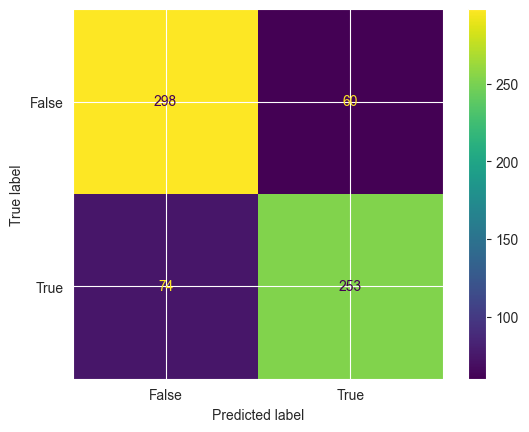

In [17]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=mnb1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb1.classes_) 
display.plot() 

# SVM model 

In [19]:
#IMPLEMENTING AND RUNNNING SVM MODEL - COUNT
svm1 = SVC(kernel='linear')
svm1.fit(train_c, y_train)
prediction = svm1.predict(test_c)

In [20]:
#EVALUATION
svm_a1 = accuracy_score(y_test, prediction)*100
svm_p1 = precision_score(y_test, prediction)* 100
svm_r1 = recall_score(y_test, prediction)*100
svm_f11 = f1_score(y_test, prediction)*100

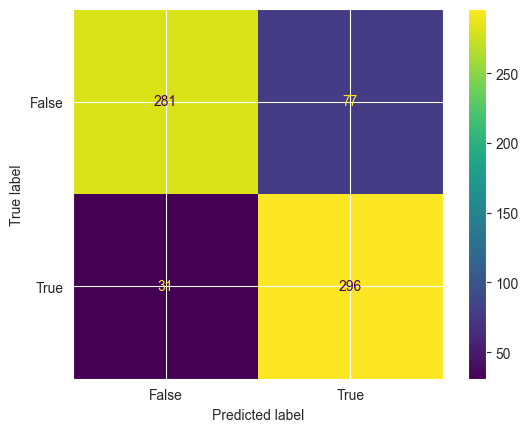

In [21]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm1.classes_) 
display.plot() 


# LOGISTIC REGRESSION 

In [1]:
#IMPLEMENTING AND RUNNNING LR MODEL - COUNT
lr1 = LogisticRegression()
lr1.fit(train_c, y_train)
prediction = lr1.predict(test_c)

NameError: name 'LogisticRegression' is not defined

In [24]:
#EVALUATION
lr_a1 = accuracy_score(y_test, prediction)*100
lr_p1 = precision_score(y_test, prediction)* 100
lr_r1 = recall_score(y_test, prediction)*100
lr_f11 = f1_score(y_test, prediction)*100

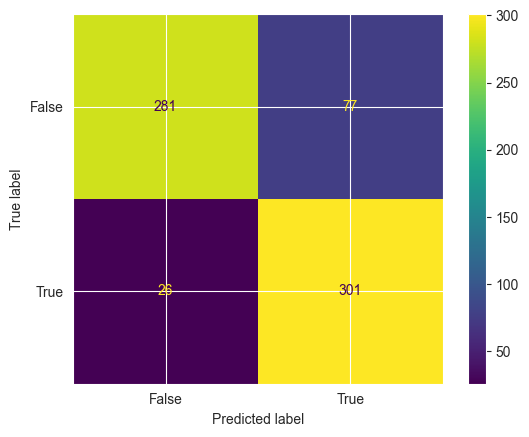

In [25]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

#TFIDF VECTORIZER AND MODELING


In [27]:
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf = TFIDF_vectorizer.fit_transform(X_train)
test_tf = TFIDF_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1498, 'price': 1310, 'compar': 343, 'supermarket': 1705, 'good': 761, 'smell': 1563, 'pleasant': 1270, 'need': 1134, 'add': 14, 'small': 1558, 'cloth': 321, 'fresh': 701, 'great': 777, 'moisturis': 1100, 'sensit': 1502, 'love': 1010, 'pour': 1293, 'smaller': 1559, 'bottl': 194, 'make': 1033, 'manag': 1037, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1580, 'nice': 1142, 'fragranc': 696, 'purchas': 1334, 'deliveri': 458, 'cream': 399, 'handwash': 802, 'cheaper': 282, 'hand': 799, 'better': 155, 'liquid': 989, 'oh': 1174, 'wing': 1916, 'dove': 516, 'kitchen': 941, 'bathroom': 131, 'shower': 1527, 'room': 1436, 'recommend': 1378, 'highli': 831, 'star': 1636, 'simpl': 1537, 'gel': 728, 'like': 978, 'glue': 754, 'hard': 806, 'rub': 1444, 'slip': 1555, 'bath': 130, 'goe': 757, 'smoothli': 1569, 'easili': 541, 'wast': 1884, 'leav': 965, 'feel': 645, 'silki': 1535, 'soft': 1579, 'scenti': 1477, 'review': 1419, 'collect': 328, 'promot': 1322, 'exc

In [28]:
#IMPLEMENTING AND RUNNING MNB MODEL - TFIDF
mnb2 = MultinomialNB()
mnb2.fit(train_tf, y_train)
prediction = mnb2.predict(test_tf)

In [29]:
#EVALUATION
mnb_a2 = accuracy_score(y_test, prediction)*100
mnb_p2 = precision_score(y_test, prediction)* 100
mnb_r2 = recall_score(y_test, prediction)*100
mnb_f12 = f1_score(y_test, prediction)*100

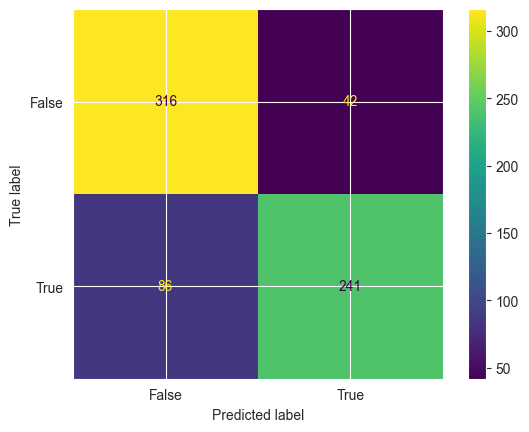

In [30]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=mnb2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb2.classes_) 
display.plot() 

In [31]:
#IMPLEMENTING AND RUNNING SVM MODEL - TFIDF 
svm2 = SVC(kernel='linear')
svm2.fit(train_tf, y_train)
prediction = svm2.predict(test_tf)

In [32]:
#EVALUATION
svm_a2 = accuracy_score(y_test, prediction)*100
svm_p2 = precision_score(y_test, prediction)* 100
svm_r2 = recall_score(y_test, prediction)*100
svm_f12 = f1_score(y_test, prediction)*100

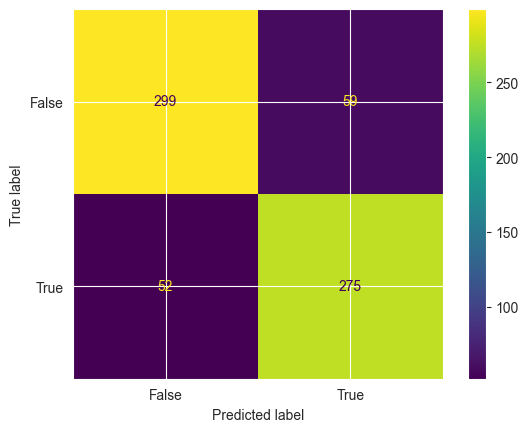

In [33]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_) 
display.plot() 

In [34]:
#IMPLEMENTATION AND RUNNING LR MODEL - TFIDF 
lr2 = LogisticRegression()
lr2.fit(train_tf, y_train)
prediction = lr2.predict(test_tf)

In [35]:
#EVALUATION
lr_a2 = accuracy_score(y_test, prediction)*100
lr_p2 = precision_score(y_test, prediction)* 100
lr_r2 = recall_score(y_test, prediction)*100
lr_f12 = f1_score(y_test, prediction)*100

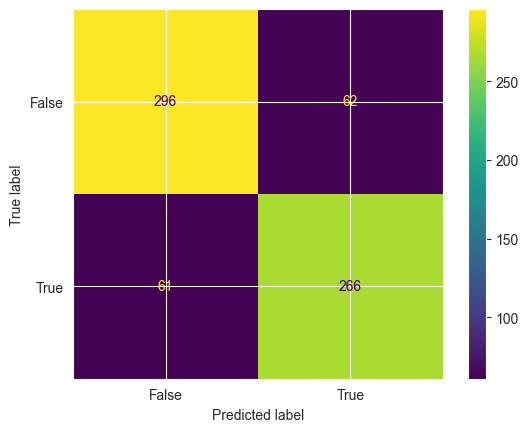

In [36]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr2.classes_) 
display.plot() 

In [37]:
model_accuracy={'MNB': [round(mnb_a1), round(mnb_a2)],
                'SVM': [round(svm_a1), round(svm_a2)],
                'LR': [round(lr_a1), round(lr_a2)]
               }
ma = pd.DataFrame(model_accuracy, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
ma


,MNB,SVM,LR
Count Vectorizer,80,84,85
Tfidf Vectorizer,81,84,82


In [38]:
model_precision={'MNB': [round(mnb_p1), round(mnb_p2)],
                'SVM': [round(svm_p1), round(svm_p2)],
                'LR': [round(lr_p1), round(lr_p2)]
               }
mp = pd.DataFrame(model_precision, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
mp

,MNB,SVM,LR
Count Vectorizer,81,79,80
Tfidf Vectorizer,85,82,81


In [39]:
model_recall={'MNB': [round(mnb_r1), round(mnb_r2)],
                'SVM': [round(svm_r1), round(svm_r2)],
                'LR': [round(lr_r1), round(lr_r2)]
               }
mr = pd.DataFrame(model_recall, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
mr

,MNB,SVM,LR
Count Vectorizer,77,91,92
Tfidf Vectorizer,74,84,81


In [40]:
model_f1={'MNB': [round(mnb_f11), round(mnb_f12)],
                'SVM': [round(svm_f11), round(svm_f12)],
                'LR': [round(lr_f11), round(lr_f12)]
               }
mf1 = pd.DataFrame(model_f1, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
mf1


,MNB,SVM,LR
Count Vectorizer,79,85,85
Tfidf Vectorizer,79,83,81


In [43]:
#SAVING THE BEST MODEL WITH ITS RESPECTIVE VECTORIZER
pickle.dump(lr1, open('Data/best_model.pkl', 'wb'))
pickle.dump(count_vectorizer, open('Data/count_vectorizer.pkl', 'wb'))

In [46]:
#LIBRARIES
import streamlit as st
import pickle
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import  PorterStemmer 
import re


#LOAD PICKLE FILES
model = pickle.load(open('Data/best_model.pkl','rb')) 
vectorizer = pickle.load(open('Data/count_vectorizer.pkl','rb')) 

#FOR STREAMLIT
nltk.download('stopwords')

#TEXT PREPROCESSING
sw = set(stopwords.words('english'))
def text_preprocessing(text):
    txt = TextBlob(text)
    result = txt.correct()
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(result))
    tokens = removed_special_characters.lower().split()
    stemmer = PorterStemmer()
    
    cleaned = []
    stemmed = []
    
    for token in tokens:
        if token not in sw:
            cleaned.append(token)
            
    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    return " ".join(stemmed)

#TEXT CLASSIFICATION
def text_classification(text):
    if len(text) < 1:
        st.write("  ")
    else:
        with st.spinner("Classification in progress..."):
            cleaned_review = text_preprocessing(text)
            process = vectorizer.transform([cleaned_review]).toarray()
            prediction = model.predict(process)
            p = ''.join(str(i) for i in prediction)
        
            if p == 'True':
                st.success("The review entered is Legitimate.")
            if p == 'False':
                st.error("The review entered is Fraudulent.")

#PAGE FORMATTING AND APPLICATION
def main():
    st.title("Fraud Detection in Online Consumer Reviews Using Machine Learning Techniques")
    
    
    
    # --CHECKBOXES--
    st.subheader("Information on the Classifier")
    if st.checkbox("About Classifer"):
        st.markdown('**Model:** Logistic Regression')
        st.markdown('**Vectorizer:** Count')
        st.markdown('**Test-Train splitting:** 40% - 60%')
        st.markdown('**Spelling Correction Library:** TextBlob')
        st.markdown('**Stemmer:** PorterStemmer')
        
    if st.checkbox("Evaluation Results"):
        st.markdown('**Accuracy:** 85%')
        st.markdown('**Precision:** 80%')
        st.markdown('**Recall:** 92%')
        st.markdown('**F-1 Score:** 85%')


    #--IMPLEMENTATION OF THE CLASSIFIER--
    st.subheader("Fake Review Classifier")
    review = st.text_area("Enter Review: ")
    if st.button("Check"):
        text_classification(review)

#RUN MAIN        
main()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


# reviews are based on  (FEATURE ENGINEERING )
Length of the review
Average word length of the reviewer
Number of sentences
Average sentence length of the reviewer
Percentage of numerals
Percentage of capitalized words

 TextBlob is a Lexicon-based sentiment analyzer
    It has some predefined rules or we can say word and weight dictionary,
    where it has some scores that help to calculate a sentence's polarity. 
    That's why the Lexicon-based sentiment analyzers are also called “Rule-based sentiment analyzers”.
    
CountVectorizer means breaking down a sentence or any text into words by performing preprocessing tasks
like converting all words to lowercase, thus removing special characters.

PUNKT is an unsupervised trainable model, which means it can be trained on unlabeled data 
(Data that has not been tagged with information identifying its characteristics, properties, 
 or categories is referred to as unlabeled data.)

word2cloud 
It is a visualization technique for text data wherein each word is picturized with its importance in the context 
or its frequency.

pandas==1.0.5
matplotlib==3.2.2
seaborn==0.10.1
textblob==0.15.3
nltk==3.5.0
regex==2020.6.8
scikit-learn==0.23.1
pickle-mixin==1.0.2

Text preprocessing is a crucial step in natural language processing (NLP) and 
is used to clean and transform raw text data into a more structured and analyzable format. 
There are several techniques for text preprocessing, including cleaning, stemming, and removing stopwords.

Cleaning:
Cleaning involves removing unwanted characters, symbols, and numbers from the text.
This step is important to ensure that the text data is in a consistent format and
does not contain any noise that may interfere with the analysis. 
The cleaning process may involve removing punctuation, HTML tags, and special characters.

Stemming:
Stemming is the process of reducing words to their base or root form. 
For example, the words "jumping," "jumps," and "jumped" would all be reduced to the base form "jump" using stemming.
This technique is useful in reducing the dimensionality of the text data and can improve the performance of machine learning models.

Stopwords:
Stopwords are common words in a language that do not carry much meaning on their own, 
such as "the," "and," and "a."
Removing these words from the text data can improve the performance of machine learning models by reducing the noise in the data. 
However, it is important to note that removing all stopwords may result in the loss of important contextual information in the text.